<a href="https://colab.research.google.com/github/Sanjana2903/Traffic_Sign_Recognition/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

In [ ]:
import cv2
from PIL import Image

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten, Dropout

In [ ]:
data = []
labels = []
classes = 43

In [ ]:
for i in range (classes):
  path = os.path.join('/content/drive/MyDrive/archive/','Train',str(i))
  images = os.listdir(path)
  for a in images:
    try:
      image = Image.open(path + '/'+ a)
      image = image.resize((30,30))
      image = np.array(image)
      data.append(image)
      labels.append(i)
    except:
      print("Error loading image")

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)

(39250, 30, 30, 3) (39250,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31400, 30, 30, 3) (7850, 30, 30, 3) (31400,) (7850,)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/25
982/982 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.2819 - loss: 3.6890 - val_accuracy: 0.8480 - val_loss: 0.5613
Epoch 2/25
982/982 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7449 - loss: 0.8683 - val_accuracy: 0.9418 - val_loss: 0.2264
Epoch 3/25
982/982 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8403 - loss: 0.5383 - val_accuracy: 0.9637 - val_loss: 0.1397
Epoch 4/25
982/982 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8840 - loss: 0.3864 - val_accuracy: 0.9726 - val_loss: 0.1026
Epoch 5/25
982/982 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9016 - loss: 0.3293 - val_accuracy: 0.9656 - val_loss: 0.1246
Epoch 6/25
982/982 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9047 - loss: 0.3256 - val_accuracy: 0.9720 - val_loss: 0.0901
Epoch 7/25
982/982 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9201 - loss: 0.2708 - val_accuracy: 0.9740 - val_loss: 0.0821
Epoch 8/25
982/982 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9168 - loss: 0.2857 - val_accuracy:

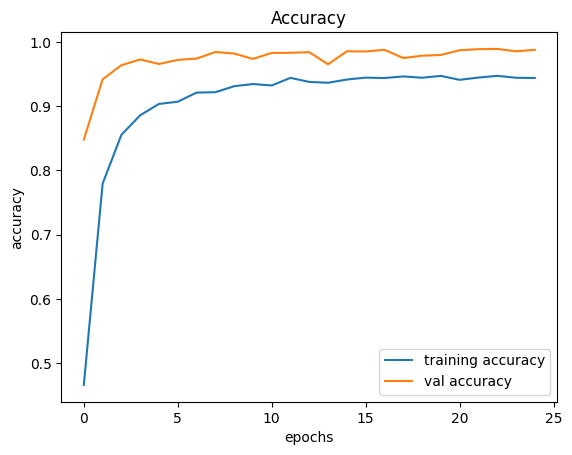

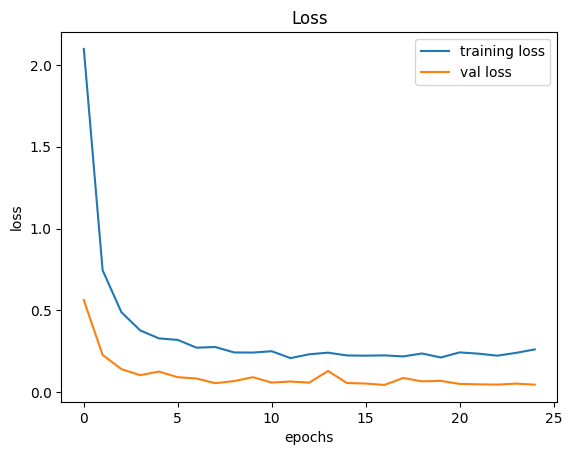

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_test = pd.read_csv('/content/drive/MyDrive/archive/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

In [ ]:
for img in imgs:
        image = Image.open('/content/drive/MyDrive/archive/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

In [ ]:
X_test=np.array(data)

In [ ]:
pred = np.argmax(model.predict(X_test), axis=-1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
pred

array([16,  1, 38, ...,  5,  7, 10])

In [ ]:
print(accuracy_score(labels, pred))

0.9580364212193191


In [ ]:
model.save('my_model.keras')

In [ ]:
from keras.models import load_model
model = load_model('/content/my_model.keras')

In [ ]:
# Dictionary mapping class indices to traffic sign names
classes = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}



In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))
    X_test = np.array(data)

    # Replace predict_classes with np.argmax
    Y_pred = np.argmax(model.predict(X_test), axis=-1)

    return image, Y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted traffic sign is: Speed limit (100km/h)


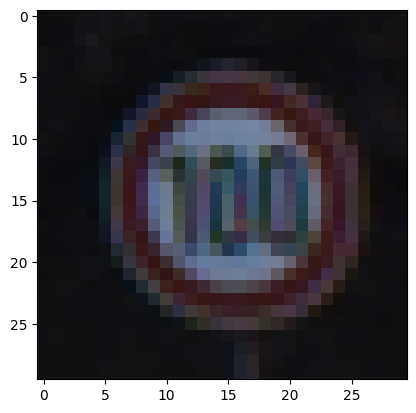

(None,)

In [ ]:
plot, prediction = test_on_img('/content/drive/MyDrive/archive/Test/00011.png')
a = prediction[0]
print("Predicted traffic sign is:", classes[a])
plt.imshow(plot)
plt.show(),